https://goo.gl/0Eht9W


https://goo.gl/j1MSKe

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from  sklearn.neighbors import KNeighborsRegressor


In [2]:
oecd_bli=pd.read_csv('oecd_bli_2015.csv',thousands=',')

In [3]:
gdp_per_capita=pd.read_csv('gdp_per_capita.xls',thousands=',',delimiter='\t',encoding='latin1',na_values="n/a")

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [5]:
country_stats=prepare_country_stats(oecd_bli,gdp_per_capita)

In [6]:
X=np.c_[country_stats["GDP per capita"]]
y=np.c_[country_stats["Life satisfaction"]]

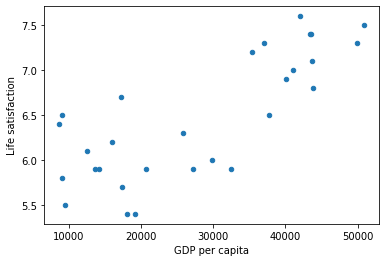

In [7]:
country_stats.plot(kind='scatter',x="GDP per capita",y='Life satisfaction')
plt.show()

In [9]:
model=KNeighborsRegressor(n_neighbors=3)

In [10]:
model.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [18]:
X_new=[[8669.998]]
print(model.predict(X_new))

[[6.23333333]]


In [16]:
X_new=[[13340]]
print(model.predict(X_new))

[[5.96666667]]


In [ ]:
13340.905